# Predicting House Sale Prices

The purpose of this project was to explore ways of improving machine learning models based on cleaning, transforming and selecting features to determine which ones were the best predictors of home sales prices in Ames, Iowa. A linear regression algorithm from Scikit Learn library was used to fit and predict training and testing sets for holdout, cross-validation and k-fold tests methods.

There are two sections in this notebook that are particularly important: "Final Code Cells," and "Experimental Cells". The "Experimental Cells" were used to optimize the features before incorporating them into the "Final Code Cells." The "Experimental Cells" explain what modifications were made. The "Final Code Cells" perform the linear regression testing for holdout, cross-validation and k-fold methods, and return the root mean squared values for each. 

### DataQuest Project Scope
This project was for the completion of the DataQuest.io https://www.dataquest.io/ "Linear Regression for Machine Learning" module; the twenty-third in a series for completing Data Science course path. In this module students learned:

- The LinearRegression Scikit Learn algorithm
- Feature selection, processing and transforming features
- Gradient Descent and Ordinary Least Squares
       

### Results Summary
After the data from the Ames, Iowa housing market was cleaned, transformed. The best performing features were selected and run through the linear regression model. The following RMSE results were obtained for Holdout, Simple Cross and K-Fold 2-5 below:
- The RMSE for Holdout validation is : 26615
- The RMSE for Simple Cross validation is : 24480
- The RMSE for K-Fold validation with two folds is : 22973
- The RMSE for K-Fold validation with three folds is : 23968
- The RMSE for K-Fold validation with four folds is : 24115
- The RMSE for K-Fold validation with five folds is : 24231

RMSE is the root mean square error between the actual and predicted sales prices. The lowest is the one with the least amount of error and therefore the best performer. Therefore, K-Fold validation with two folds is performed the best. 

# Data Source and Exploration
This data was originally compiled by Dean De Cock for the primary purpose of having a high quality dataset for students to complete a final project for a regression course. The reasoning behind his motivation and the dataset can be found [here](https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627). A list of all the columns and their corresponding descriptions can be found [here](https://s3.amazonaws.com/dq-content/307/data_description.txt)

The original dataset contained 2930 rows and 82 columns, chocked full of null-values, and various d-types. A substantial amount of time was spent exploring the columns; aka 'features', to determine which ones would provide the best predictors for price. 

In [1070]:
# Import Python Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

In [1071]:
# Read in first 5 rows
data = pd.read_csv('AmesHousing.tsv', delimiter = '\t')
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [1072]:
# Find number of rows and columns
data.shape

(2930, 82)

In [1073]:
# Explore null values and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

# Final Code Cells
The following cells are the core of the program. It begins with the **transform_features()** function. This function is the result and the consolidation of cleaning, transforming and selecting features; performed and explained in detail in the "Experimental Cells" below. 

The **transform_features()** function returns the modified data frame, which is then trained, tested, fitted and predicted using a linear regression model inside the **train_and_test()** function. The **train_and_test()** function allows the user to input how many "folds" (aka "splits") they want to make to the rows on the data frame, corresponding to the validation method they want to use: 
- k = 0 Holout validation: where 50% of the rows are used for training; 50% are used for testing. Returns the RMSE value between the predicted and actual sales price.  
- k = 1 Simple cross validation: where holdout is performed, then the training and testing rows are switched.The aggregate average RMSE between the two is taken and returned. This is the RMSE between predicted and actual sales price.  
- k = n > 1 K-Fold validation: the rows are split n number of times. n-1 is assigned for training and the remaining split is assigned to testing. Then, they are rotated n number of times so that each split is assigned to training at least once. The aggregate average of all RMSE values are returned. This is the RMSE between predicted and actual sales price.   

The lowest RMSE is the one with the least amount of error between the predicted and actual sales price; and therefore, the module that is most accurate. 

In [1074]:
def transform_features(df):
    df = df.copy()
    numeric_train = df.select_dtypes(include = ['int64', 'float64'])
    numeric_train = numeric_train.copy()
    # Retain numeric columns
    # Drop useless columns that should be catagorical or not useful
    numeric_train = numeric_train.drop(columns = ['PID', 'Year Built', 
                              'Year Remod/Add', 'Garage Yr Blt', 
                              'Mo Sold', 'Yr Sold','Bsmt Full Bath'])
    null_series = numeric_train.isnull().sum()
    # Retain only columns with <5%  or < 73 null values.
    # Replace null values with most popular value, i.e. mode.
    filt = null_series < 73
    full_cols_series = null_series[filt]
    numeric_train = numeric_train[full_cols_series.index]
    # numeric_train = numeric_train.fillna(numeric_train.mode())
    for column in numeric_train: 
        numeric_train[column].fillna(numeric_train[column].mode()[0], inplace = True)
        numeric_train.isnull().sum()
    # Find the numeric columns that correlate the closest to sale price
    train_subset = numeric_train[full_cols_series.index]
    train_corr = train_subset.corr()
    train_SP = train_corr['SalePrice']
    sorted_corrs = train_SP.abs().sort_values()
    # Keep only features that have a correlation of 0.3 or higher 
    strong_corrs = sorted_corrs[sorted_corrs > 0.3]
    strong_corrs = strong_corrs.index
    strong_corrs
    # Gr Liv Area and TotRms AbvGrd, and Garage Area and Garage Cars are redundant 
    # keep Gr Liv Area and Garage Area because they are continuous variables and drop the other
    numeric_cols = strong_corrs.drop(['Garage Cars', 'TotRms AbvGrd', 'SalePrice'])
    # rescale values
    rescale = (numeric_train[numeric_cols] - 
              numeric_train[numeric_cols].min())/(numeric_train[numeric_cols].max() - 
              numeric_train[numeric_cols].min())
    numeric_train = rescale.copy()
    numeric_train.var().sort_values()
    numeric_train = numeric_train.drop('Open Porch SF', axis = 1)

## Add year_remodel builtyears_sold = df['Yr Sold'] - df['Year Built']
    years_sold = df['Yr Sold'] - df['Year Built']
    years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
    numeric_train['Years Before Sale'] = years_sold
    numeric_train['Years Since Remod'] = years_since_remod
#     numeric_train['SalePrice'] = df['SalePrice']
    
    
    # Catagorical columns
    text_train = df.copy()
    text_cols = text_train.select_dtypes(include = ['object']).columns
    text_train = text_train[text_cols]
    text_train.isnull().sum()
    # drop columns with null values
    text_train = text_train.dropna(axis = 'columns', how = 'any')
    text_train = text_train.copy()
    for col in text_train:   
        text_train[col] = text_train[col].astype('category')
        text_cols = text_train.columns
    # Create dummy columns 
    dummy_cols = pd.DataFrame(pd.get_dummies(text_train[text_cols]))
    for col in text_cols:
        col_dummies = pd.get_dummies(text_train[col])
        train = pd.concat([text_train,col_dummies], axis = 1)
    del train[col]
    text_cols = dummy_cols
    

    ## drop 
    df = df.drop(["PID", "Order", "Mo Sold", "Sale Condition", "Sale Type", "Year Built", "Year Remod/Add"], axis=1)
    
    ### Combine numeric and catagorical columns
    merged_df = pd.merge(numeric_train,text_cols,how="inner",left_index=True,right_index=True)
    ### add sale price back in
    merged_df['SalePrice'] = df['SalePrice']
    merged_df.dropna(inplace= True)
    return merged_df

In [1075]:
def select_features(df):
    cols  = list(df.columns.drop('SalePrice'))
    target = ['SalePrice']
    return cols, target
    
features, targ = select_features(transform_features(data))

In [1076]:
def train_and_test(df,cols, target, k):
    lr = LinearRegression()
    if k == 0 or k == 1: # perform holdout validation
        shuffled_df = df.sample(frac=1, )
        train = df.loc[:len(df)/2]
        test = df.loc[len(df)/2:]
        
        lr.fit(df[cols], df[target])

        predictions = lr.predict(test[cols])
        test_mse = mean_squared_error(test[target], predictions)
        test_rmse = test_mse**.5
        if k == 0: 
            return round(test_rmse, 0)   
    
        elif k == 1: # perform simple cross validation
            test = df.loc[:len(df)/2]
            train = df.loc[len(df)/2:]

            lr.fit(df[cols], df[target])

            predictions = lr.predict(test[cols])
            test_mse_2 = mean_squared_error(test[target], predictions)
            test_rmse_2 = test_mse_2**.5
        
            test_list = [test_rmse, test_rmse_2]

            simple_avg_rmse = np.mean(test_list)
   
            return round(simple_avg_rmse, 0)
    
    
    elif k > 1: # perform k-fold cross val
        kf = KFold(n_splits = k, shuffle = True)
        rmse_values = []
        for train_index, test_index in kf.split(df):
            train = df.iloc[train_index]
            test = df.loc[train_index]
            
            lr.fit(train[features], train['SalePrice'])
            predictions = lr.predict(test[cols])
             # get average rmse and return results
            mse = mean_squared_error(test['SalePrice'], predictions)
            rmse = np.sqrt(mse)
            rmse_values.append(rmse)
        k_fold_avg_rmse = np.mean(rmse_values)
        return round(k_fold_avg_rmse,0)
        
transformed_df = transform_features(data)

In [1077]:
k_0 = train_and_test(transformed_df, features, targ, 0)
print('The RMSE for Holdout validation is :', k_0)
k_1 = train_and_test(transformed_df, features, targ,  1)
print('The RMSE for Simple Cross validation is :' , k_1)
k_2 = train_and_test(transformed_df, features, targ, 2)
print('The RMSE for K-Fold validation with two folds is :' , k_2)
k_3 = train_and_test(transformed_df, features, targ, 3)
print('The RMSE for K-Fold validation with three folds is :' , k_3)
k_4 = train_and_test(transformed_df, features, targ, 4)
print('The RMSE for K-Fold validation with four folds is :' , k_4)
k_5 = train_and_test(transformed_df, features, targ, 5)
print('The RMSE for K-Fold validation with five folds is :' , k_5)

The RMSE for Holdout validation is : 26616.0
The RMSE for Simple Cross validation is : 24481.0
The RMSE for K-Fold validation with two folds is : 22993.0
The RMSE for K-Fold validation with three folds is : 24052.0
The RMSE for K-Fold validation with four folds is : 24079.0
The RMSE for K-Fold validation with five folds is : 24221.0


# EXPERIMENTAL CELLS
First, the numerical columns were isolated. From this subset, columns that were actually categorical, missing more than 5% of their data, or just not useful were dropped. Of the remaining columns, those that were missing data were filled in with their mode. Once the numerical columns were cleaned and filled, the pd.dataframe.corr() method was applied to determine which columns, aka 'features' correlated closest to the sale price. Features that were redundant or had a correlation coefficient < 0.3 were dropped. Value were then normalized from 0 to 1, and checked for low variance. One low variance columns was dropped. 

Next, two new columns were created and added to the numerical dataframe: 
- 'years_sold' was the difference between: 'Yr Sold' and 'Year Built'
- 'years_since_remod' was the difference between: 'Yr Sold' and 'Year Remod/Add'
Year values alone do not offer any correlative value to sales price. However, the difference between years, does. 

Next, the categorical values were isolated. From this subset, any columns that had missing values were dropped. Of the 27 columns that remained, the pd.get_dummies() method was used on the data frame to convert them into dummy columns. 

Finally, the numerical and the categorical data frames were merged and integrated into the **transform_features()** function under the "Final Code Cells" above. 

In [1078]:
# Copy dataframe
train_ex = data.copy()
train_ex.shape

(2930, 82)

### Numerical columns

In [1079]:
# Retain numeric columns
numeric_train = train_ex.select_dtypes(include = ['int64', 'float64'])
numeric_train = numeric_train.copy()
# Drop useless columns that should be categorical or not useful
numeric_train = numeric_train.drop(columns = ['PID', 'Year Built', 
                              'Year Remod/Add', 'Garage Yr Blt', 
                              'Mo Sold', 'Yr Sold','Bsmt Full Bath'])

null_series = numeric_train.isnull().sum()
null_series

Order                0
MS SubClass          0
Lot Frontage       490
Lot Area             0
Overall Qual         0
Overall Cond         0
Mas Vnr Area        23
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Half Bath       2
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Cars          1
Garage Area          1
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
SalePrice            0
dtype: int64

In [1080]:
# Retain only columns with <5%  or < 73 null values.
# Replace null values with most popular value, i.e. mode.
filt = null_series < 73
full_cols_series = null_series[filt]
numeric_train = numeric_train[full_cols_series.index]

In [1081]:
# numeric_train = numeric_train.fillna(numeric_train.mode())
for column in numeric_train: 
    numeric_train[column].fillna(numeric_train[column].mode()[0], inplace = True)
numeric_train.isnull().sum()

Order              0
MS SubClass        0
Lot Area           0
Overall Qual       0
Overall Cond       0
Mas Vnr Area       0
BsmtFin SF 1       0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
SalePrice          0
dtype: int64

In [1082]:
# Find the numeric columns that correlate the closest to sale price
train_subset = train_ex[full_cols_series.index]
train_corr = train_subset.corr()
train_SP = train_corr['SalePrice']
sorted_corrs = train_SP.abs().sort_values()
# Keep only features that have a correlation of 0.3 or higher 
strong_corrs = sorted_corrs[sorted_corrs > 0.3]
strong_corrs = strong_corrs.index
strong_corrs

Index(['Open Porch SF', 'Wood Deck SF', 'BsmtFin SF 1', 'Fireplaces',
       'TotRms AbvGrd', 'Mas Vnr Area', 'Full Bath', '1st Flr SF',
       'Total Bsmt SF', 'Garage Area', 'Garage Cars', 'Gr Liv Area',
       'Overall Qual', 'SalePrice'],
      dtype='object')

<AxesSubplot:>

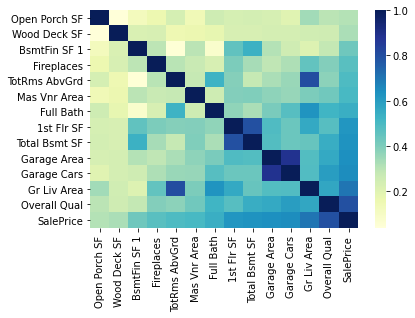

In [1083]:
# Heat map for the remaining columns
corrmat = train_subset[strong_corrs]
corrmat.corr()
sns.heatmap(corrmat.corr(), cmap="YlGnBu")

In [1084]:
# Gr Liv Area and TotRms AbvGrd, and Garage Area and Garage Cars are redundant 
# keep Gr Liv Area and Garage Area because they are continuous variables and drop the other
numeric_cols = strong_corrs.drop(['Garage Cars', 'TotRms AbvGrd', 'SalePrice'])
numeric_cols

Index(['Open Porch SF', 'Wood Deck SF', 'BsmtFin SF 1', 'Fireplaces',
       'Mas Vnr Area', 'Full Bath', '1st Flr SF', 'Total Bsmt SF',
       'Garage Area', 'Gr Liv Area', 'Overall Qual'],
      dtype='object')

In [1085]:
# rescale values
rescale = (numeric_train[numeric_cols] - 
              numeric_train[numeric_cols].min())/(numeric_train[numeric_cols].max() - 
              numeric_train[numeric_cols].min())
numeric_train = rescale.copy()

In [1086]:
# remove columns with low variance
numeric_train.var().sort_values()

Total Bsmt SF    0.005209
BsmtFin SF 1     0.006516
1st Flr SF       0.006775
Wood Deck SF     0.007874
Open Porch SF    0.008272
Gr Liv Area      0.009070
Mas Vnr Area     0.012465
Full Bath        0.019109
Garage Area      0.020914
Overall Qual     0.024580
Fireplaces       0.026238
dtype: float64

In [1087]:
# drop Open Porch SF due to low variance
numeric_train = numeric_train.drop('Open Porch SF', axis = 1)
numeric_train.head()

,Wood Deck SF,BsmtFin SF 1,Fireplaces,Mas Vnr Area,Full Bath,1st Flr SF,Total Bsmt SF,Garage Area,Gr Liv Area,Overall Qual
0,0.147472,0.113218,0.50,0.0700,0.25,0.277673,0.176759,0.354839,0.249058,0.555556
1,0.098315,0.082920,0.00,0.0000,0.25,0.118042,0.144354,0.490591,0.105878,0.444444
2,0.275983,0.163536,0.00,0.0675,0.25,0.208990,0.217512,0.209677,0.187453,0.555556
3,0.000000,0.188696,0.50,0.0000,0.50,0.373031,0.345336,0.350806,0.334589,0.666667
4,0.148876,0.140149,0.25,0.0000,0.50,0.124764,0.151882,0.323925,0.243971,0.444444


In [1088]:
numeric_train.describe()

,Wood Deck SF,BsmtFin SF 1,Fireplaces,Mas Vnr Area,Full Bath,1st Flr SF,Total Bsmt SF,Garage Area,Gr Liv Area,Overall Qual
count,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,0.065837,0.078398,0.149829,0.063186,0.391638,0.173400,0.172055,0.317647,0.219610,0.566098
std,0.088737,0.080720,0.161980,0.111647,0.138235,0.082313,0.072172,0.144615,0.095235,0.156781
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.250000,0.113894,0.129787,0.215054,0.149209,0.444444
50%,0.000000,0.065556,0.250000,0.000000,0.500000,0.157530,0.162029,0.322581,0.208742,0.555556
75%,0.117978,0.130050,0.250000,0.101719,0.500000,0.220542,0.213011,0.387097,0.265401,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1089]:
## Add year_remodel builtyears_sold = df['Yr Sold'] - df['Year Built']
years_sold = train_ex['Yr Sold'] - train_ex['Year Built']
years_since_remod = train_ex['Yr Sold'] - train_ex['Year Remod/Add']
numeric_train['Years Before Sale'] = years_sold
numeric_train['Years Since Remod'] = years_since_remod

### Categorical columns

In [1090]:
# Separate the categorical columns, find the null values
text_train = train_ex.copy()
text_cols = text_train.select_dtypes(include = ['object']).columns
text_train = text_train[text_cols]
text_train.isnull().sum()

MS Zoning            0
Street               0
Alley             2732
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        23
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin Type 2      81
Heating              0
Heating QC           0
Central Air          0
Electrical           1
Kitchen Qual         0
Functional           0
Fireplace Qu      1422
Garage Type        157
Garage Finish      159
Garage Qual        159
Garage Cond        159
Paved Drive          0
Pool QC           2917
Fence             2358
Misc Feature      2824
Sale Type            0
Sale Condition       0
dtype: int6

In [1091]:
# drop columns with null values
text_train = text_train.dropna(axis = 'columns', how = 'any')
text_train = text_train.copy()

In [1092]:
# find the number of unique values in each catagorical feature
for col in text_train: 
    print(col+':', len(text_train[col].unique()))
    
    text_train[col] = text_train[col].astype('category')

MS Zoning: 7
Street: 2
Lot Shape: 4
Land Contour: 4
Utilities: 3
Lot Config: 5
Land Slope: 3
Neighborhood: 28
Condition 1: 9
Condition 2: 8
Bldg Type: 5
House Style: 8
Roof Style: 6
Roof Matl: 8
Exterior 1st: 16
Exterior 2nd: 17
Exter Qual: 4
Exter Cond: 5
Foundation: 6
Heating: 6
Heating QC: 5
Central Air: 2
Kitchen Qual: 5
Functional: 8
Paved Drive: 3
Sale Type: 10
Sale Condition: 6


In [1093]:
# Create dummy columns 
text_cols = text_train.columns
dummy_cols = pd.DataFrame(pd.get_dummies(text_train[text_cols]))
for col in text_cols:
    col_dummies = pd.get_dummies(text_train[col])
    train = pd.concat([text_train,col_dummies], axis = 1)
    del train[col]

In [1094]:
text_cols = dummy_cols

In [1095]:
text_cols

,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Lot Shape_IR1,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0,0,0,0,0,1,0,0,1,1,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,1,1,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,0,0,0,0,0,1,0,0,1,1,...,0,0,0,1,0,0,0,0,1,0
2926,0,0,0,0,0,1,0,0,1,1,...,0,0,0,1,0,0,0,0,1,0
2927,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2928,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [1096]:
# merge the numerical and categorical dataframes
merged_df = pd.merge(
    numeric_train,
    text_cols,
    how="inner",
    left_index=True,
    right_index = True
)
merged_df['SalePrice'] = train_ex['SalePrice']

In [1097]:
# Final merged dataframe
merged_df

,Wood Deck SF,BsmtFin SF 1,Fireplaces,Mas Vnr Area,Full Bath,1st Flr SF,Total Bsmt SF,Garage Area,Gr Liv Area,Overall Qual,...,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial,SalePrice
0,0.147472,0.113218,0.50,0.07000,0.25,0.277673,0.176759,0.354839,0.249058,0.555556,...,0,0,1,0,0,0,0,1,0,215000
1,0.098315,0.082920,0.00,0.00000,0.25,0.118042,0.144354,0.490591,0.105878,0.444444,...,0,0,1,0,0,0,0,1,0,105000
2,0.275983,0.163536,0.00,0.06750,0.25,0.208990,0.217512,0.209677,0.187453,0.555556,...,0,0,1,0,0,0,0,1,0,172000
3,0.000000,0.188696,0.50,0.00000,0.50,0.373031,0.345336,0.350806,0.334589,0.666667,...,0,0,1,0,0,0,0,1,0,244000
4,0.148876,0.140149,0.25,0.00000,0.50,0.124764,0.151882,0.323925,0.243971,0.444444,...,0,0,1,0,0,0,0,1,0,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,0.084270,0.145110,0.00,0.00000,0.25,0.140517,0.164157,0.395161,0.126036,0.555556,...,0,0,1,0,0,0,0,1,0,142500
2926,0.115169,0.053331,0.00,0.00000,0.25,0.119303,0.141408,0.325269,0.107008,0.444444,...,0,0,1,0,0,0,0,1,0,131000
2927,0.056180,0.059709,0.00,0.00000,0.25,0.133585,0.149264,0.000000,0.119819,0.444444,...,0,0,1,0,0,0,0,1,0,132000
2928,0.168539,0.189759,0.25,0.00000,0.25,0.221592,0.227332,0.280914,0.198757,0.444444,...,0,0,1,0,0,0,0,1,0,170000
